<a href="https://colab.research.google.com/github/juliocesaria/emotion-detection-nlp/blob/main/01_data_exploration_goemotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration – GoEmotions

This notebook performs an exploratory data analysis (EDA) on the GoEmotions dataset.
The goal is to understand:

- Emotion label distribution
- Text length characteristics
- General dataset structure

These insights will guide preprocessing and modeling decisions in later stages.



In [33]:
print("Notebook initialized successfully")


Notebook initialized successfully


In [34]:
!pip install -q datasets transformers pandas matplotlib seaborn


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset


In [36]:
dataset = load_dataset("go_emotions")
dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [37]:
dataset["train"][0]


{'text': "My favourite food is anything I didn't have to cook myself.",
 'labels': [27],
 'id': 'eebbqej'}

In [38]:
df = pd.DataFrame(dataset["train"])
df.head()


,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [39]:
len(df)


43410

In [40]:
emotion_labels = [
    "admiration", "amusement", "anger", "annoyance", "approval",
    "caring", "confusion", "curiosity", "desire", "disappointment",
    "disapproval", "disgust", "embarrassment", "excitement", "fear",
    "gratitude", "grief", "joy", "love", "nervousness",
    "optimism", "pride", "realization", "relief", "remorse",
    "sadness", "surprise", "neutral"
]

len(emotion_labels)


28

In [41]:
from collections import Counter

all_labels = []

for labels in df["labels"]:
    all_labels.extend(labels)

emotion_counts = Counter(all_labels)
emotion_counts


Counter({27: 14219,
         2: 1567,
         14: 596,
         3: 2470,
         26: 1060,
         15: 2662,
         8: 641,
         20: 1581,
         0: 4130,
         6: 1368,
         1: 2328,
         4: 2939,
         5: 1087,
         12: 303,
         22: 1110,
         9: 1269,
         16: 77,
         25: 1326,
         7: 2191,
         17: 1452,
         18: 2086,
         13: 853,
         10: 2022,
         24: 545,
         11: 793,
         23: 153,
         21: 111,
         19: 164})

In [42]:
emotion_df = pd.DataFrame({
    "emotion": [emotion_labels[i] for i in emotion_counts.keys()],
    "count": emotion_counts.values()
}).sort_values(by="count", ascending=False)

emotion_df


,emotion,count
0,neutral,14219
8,admiration,4130
11,approval,2939
5,gratitude,2662
3,annoyance,2470
10,amusement,2328
18,curiosity,2191
20,love,2086
22,disapproval,2022
7,optimism,1581


## Emotion Distribution

The GoEmotions dataset is highly imbalanced.
Neutral, admiration, and approval are the most frequent labels,
while emotions such as grief and pride appear rarely.

This imbalance must be considered during model training.


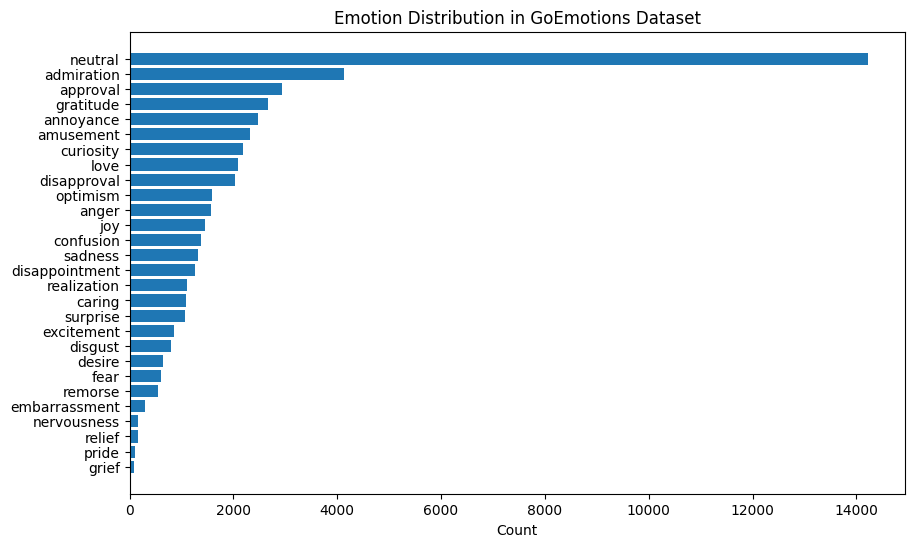

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(emotion_df["emotion"], emotion_df["count"])
plt.xlabel("Count")
plt.title("Emotion Distribution in GoEmotions Dataset")
plt.gca().invert_yaxis()
plt.show()


In [44]:
df["text_length"] = df["text"].apply(len)
df[["text", "text_length"]].head()


,text,text_length
0,My favourite food is anything I didn't have to...,59
1,"Now if he does off himself, everyone will thin...",112
2,WHY THE FUCK IS BAYLESS ISOING,30
3,To make her feel threatened,27
4,Dirty Southern Wankers,22


## Text Length Analysis

Most texts are relatively short, with a median length around 65 characters.
This suggests that transformer-based models can process the data efficiently
without aggressive truncation.


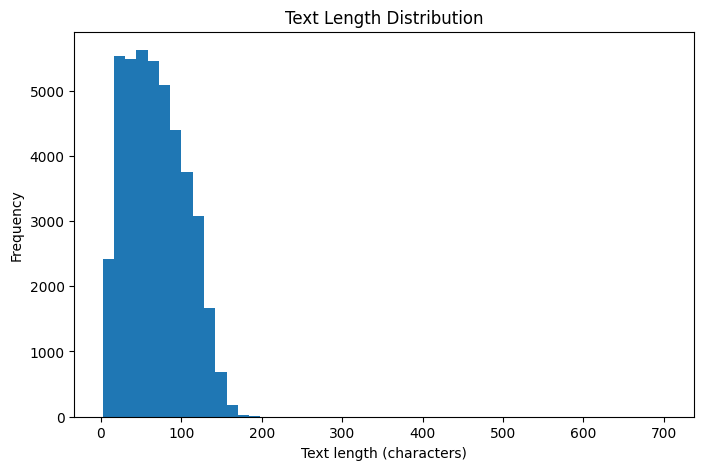

In [45]:
plt.figure(figsize=(8,5))
plt.hist(df["text_length"], bins=50)
plt.xlabel("Text length (characters)")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.show()


In [46]:
df["text_length"].describe()


,text_length
count,43410.000000
mean,68.400875
std,36.721898
min,2.000000
25%,38.000000
50%,65.000000
75%,96.000000
max,703.000000


## Key Insights

From this exploratory analysis we conclude:

- The dataset contains over 43k training samples with 28 emotion labels.
- Emotion distribution is strongly imbalanced.
- Most texts are short, which is suitable for transformer-based models.
- Special care will be needed during preprocessing and training
  (e.g. class imbalance handling, multilabel encoding).

The next step is preprocessing and model training.

